### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
from tensorflow.keras.models import model_from_json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from skimage.filters import sobel
from scipy import ndimage as ndi
from skimage.io import imread, imshow

In [15]:
class_names = {0:'benign', 1:'melanoma'}

### model loading

In [16]:
f = Path("model/model_structure.json")
model_structure = f.read_text()
model = model_from_json(model_structure)
model.load_weights("model/model_weights.h5")

### user input

***user input image loading and mask generation***

In [46]:
input_path = "user_input/b4.jpg"

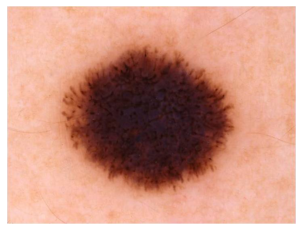

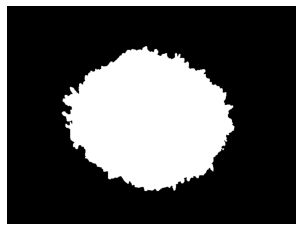

In [47]:
cv_img=cv2.imread(input_path,1)
plt.imshow(cv2.cvtColor(cv_img,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
cv_img=cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
ret, bw_img = cv2.threshold(cv_img,120,220,cv2.THRESH_BINARY)
x = np.where(bw_img == 0, 250,bw_img)
y =  np.where(x == 255, 0,x)
z = sobel(bw_img)
mask_image = ndi.binary_fill_holes(z)             
mimg = Image.fromarray(np.uint8(mask_image * 255))
plt.imshow(mimg,cmap="gray")
plt.axis("off")
plt.show()

mimg.save("results/mask.png")

### feature extraction

In [48]:
img = imread(input_path,0)
mask = imread("results/mask.png")
ret, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
extracted = cv2.bitwise_or(img, img, mask=mask)
extracted = cv2.cvtColor(extracted, cv2.COLOR_BGR2RGB)
cv2.imwrite("results/feature.png", extracted)

True

### feature image loading

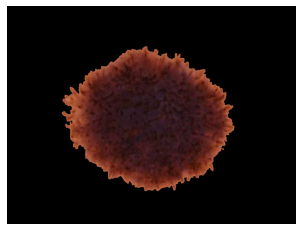

In [53]:
img = cv2.imread("results/feature.png", 1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
img = np.array(cv2.resize(img, (128,128)))
img = img/255.0
img = np.expand_dims(img, axis=0)

In [50]:
results = model.predict(img)
print(results)

[[9.995043e-01 8.478761e-04]]


In [51]:
model_label=np.argmax(results[0])
predicted_class=class_names[model_label]
print("model prediction is {} and probability score is {:.2f}%".format(predicted_class,results[0][model_label]*100.0))

model prediction is benign and probability score is 99.95%


## Thank You